# 4.7: Deriving New Variables








## Contents List:

### 1. Course Excercise
- 1-2. Creating department column by mapping department_id to 'dept' dataframe dictionary

### 2. Task 4.7

#### 2-1. Question 2.  
- 2-1-1. Clients have changed their minds about the labels are created in “busiest_day” column. Now, they want “Busiest day” to become “Busiest days” (plural) as two busiest/ slowest days.

#### 2-2. Question 3. 
- 2-2-1. Check the values of this new column for accuracy. Note any observations in markdown format.

#### 2-3. Question 4. Identify the busiest hours of the day.
#### 2-4. Question 5. Print the frequency for this new column.
#### 2-5. Question 6. Ensure your notebook is clean and structured and that your code is well commented.
#### 2-6. Question 7. Export your dataframe as a pickle file.
** **


### Question 1. Course Excercise

In [53]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [26]:
# set path

path = r'C:\Users\mehrn\OneDrive\Desktop\CareerFoundry Materials\Tasks\Python\10-01-23 Instacart Basket Analysis'

In [30]:
# Import department dataset

dept = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [28]:
#Import ords_prods dataset

ords_prods = pd.read_pickle (os.path.join(path, '02 Data', 'Prepared Data', 'merged_ordsprods.pkl'))

In [29]:
ords_prods.tail()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge
32312451,1468376,188826,4,5,14,30.0,False,1389.0,3.0,1.0,Cranberry Grape 100% Juice Blend,98,7,4.699219,both
32312452,1602138,194719,2,3,14,26.0,False,1389.0,2.0,0.0,Cranberry Grape 100% Juice Blend,98,7,4.699219,both
32312453,1025759,191198,37,6,13,3.0,False,1561.0,1.0,0.0,Original Shreds,21,16,1.900391,both
32312454,1517645,191198,67,6,8,4.0,False,1561.0,3.0,1.0,Original Shreds,21,16,1.900391,both
32312455,1104816,198258,14,1,20,4.0,False,1561.0,8.0,0.0,Original Shreds,21,16,1.900391,both


In [4]:
# Subset of the dataframe—the first one million rows

df = ords_prods[:1000000]

In [5]:
df.shape

(1000000, 15)

### deriving a new column for price range

In [6]:
# Define price_lable function. Row is a standard argument telling the function to look at each row within the dataframe.

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [7]:
# Call price_label function. This creates a new column within the df dataframe called “price_range” and designates it as the location for your labels.
# This axis = 1 stands for “rows,” so it’s essentially telling Python to apply the function to all rows within the dataframe.
# (Conversely, axis = 0 would refer to all columns within the dataframe.)

df['price_range'] = df.apply(price_label, axis=1)

C:\Users\mehrn\AppData\Local\Temp\ipykernel_12256\1536941158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [8]:
df['price_range'].value_counts(dropna = False)

Mid-range product    879842
Low-range product    120158
Name: price_range, dtype: int64

In [9]:
df['prices'].max()

15.0

In [10]:
df.loc[df['price_range'].isin(['High range'])]

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range


In [11]:
#Repeating If-Statements with the loc() Function

df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

C:\Users\mehrn\AppData\Local\Temp\ipykernel_12256\1650794291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'


In [40]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 


In [41]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [42]:
df['price_range'].value_counts(dropna = False)

Mid-range product    879842
Low-range product    120158
Name: price_range, dtype: int64

In [43]:
# Apply If condition to the entire dataframe, 'ords_prods',  instead of a subset

ords_prods.loc[ords_prods['prices'] <=5,'price_range_loc'] = 'Low-range product'

In [44]:
ords_prods.loc[ords_prods['prices']>15, 'price_range_loc'] = 'High-range product'

In [45]:
ords_prods.loc[(ords_prods['prices']>5) & (ords_prods['prices'] <=15), 'price_range_loc'] = 'Mid-range product'

In [46]:
ords_prods['price_range_loc'].value_counts(dropna = False)

Mid-range product     22430163
Low-range product      9603547
High-range product      278746
Name: price_range_loc, dtype: int64

### 1-2. Creating department column by mapping dep_id to department dataframe dictionary

In [33]:
# Renaming index column to a clear naem

dept.rename(columns= {"Unnamed: 0": "department_id"}, inplace=True)
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [37]:
# Pairing the tupple of {'department_id' , 'department'} with zip() function to create a dictionary

dprt_map=dict(zip(dept["department_id"], dept["department"]))
dprt_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [35]:
# Mapping ords_prods to department df by the map() function and department dictionary(dprt_map)

ords_prods['department'] = ords_prods['department_id'].map(dprt_map)

In [38]:
ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,department
0,2539329,1,1,2,8,-1.0,True,196.0,1.0,0.0,Soda,77,7,9.0,both,beverages
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,beverages


In [129]:
ct_dep_prc = pd.crosstab(ords_prods['department'], ords_prods['price_range_loc'])
ct_dep_prc

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,104995,992500
babies,0,110641,712478
bakery,0,164113,424005
beverages,0,624572,1934845
breakfast,0,351433,477260
bulk,0,0,4555
canned goods,0,354209,1111244
dairy eggs,11987,1175909,1689755
deli,0,178634,574241


(-1.0, 21.0)

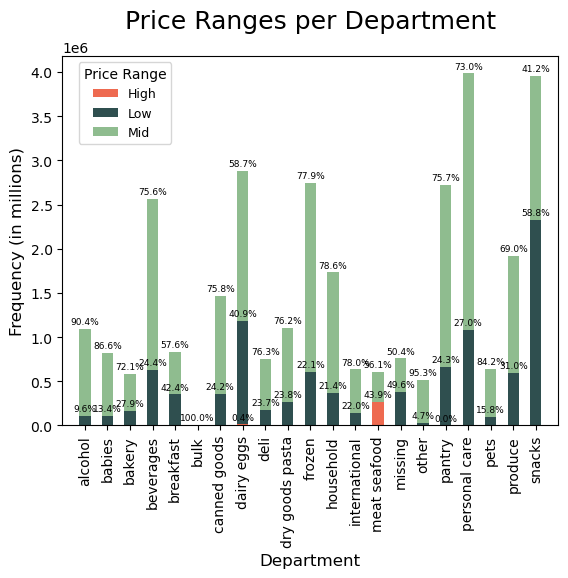

In [137]:
bar_price_dept = ct_dep_prc.plot(kind = 'bar', stacked= True, color =['#EE6A50' , '#2F4F4F', '#8FBC8F'])
bar_price_dept.legend(title='Price Range', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['High', 'Low', 'Mid'], fontsize = 9)
plt.title('Price Ranges per Department', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)
plt.xticks(rotation=90)

# Annotating the stacked bar chart

# Get the total for each row
total = ct_dep_prc.sum(axis=1)

# Calculate the percent for each row
per = ct_dep_prc.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_price_dept.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_price_dept.bar_label(c, labels=labels, label_type='edge', fontsize = 6.5, rotation = 0,  fontweight= 'normal', padding = 2)  
    
# Set the x axis limit to increase the axis length
plt.xlim(-1, 21)
    
   

In [136]:
ords_prods.groupby(['price_range_loc', 'department']).agg({'prices' :['count','min', 'max', 'mean']})

prices                                 
                                      count        min        max       mean
price_range_loc    department                                               
High-range product dairy eggs         11987        inf        inf        NaN
                   meat seafood      266531  15.101562  24.906250  18.640625
                   pantry               228  20.000000  20.000000  20.000000
Low-range product  alcohol           104995   1.200195   5.000000   2.292969
                   babies            110641   1.400391   5.000000   3.568359
                   bakery            164113   1.099609   4.898438   3.556641
                   beverages         624572   1.000000   5.000000   3.097656
                   breakfast         351433   1.099609   4.898438   3.353516
                   canned goods      354209   1.000000   5.000000   3.095703
                   dairy eggs       1175909   1.000000   5.000000   3.539062
                   deli              178634   1.000000   5.000000   3.144531
                   dry goods pasta   263996   1.000000   5.000000   3.216797
                   frozen            604540   1.099609   5.000000   2.976562
                   household         369968   1.000000   5.000000   3.203125
                   international     139534   1.099609   5.000000   3.523438
                   missing           375776   1.200195   5.000000   2.542969
                   other              24079   1.099609   4.800781   2.523438
                   pantry            660253   1.000000   5.000000   2.929688
                   personal care    1077017   1.000000   5.000000   3.064453
                   pets              101472   1.000000   4.898438   3.761719
                   produce           593300   1.099609   5.000000   3.052734
                   snacks           2329106   1.599609   5.000000   3.150391
Mid-range product  alcohol           992500   5.500000  15.000000  10.695312
                   babies            712478   5.199219  15.000000  10.015625
                   bakery            424005   5.101562  14.898438   9.671875
                   beverages        1934845   5.101562  15.000000  10.179688
                   breakfast         477260   5.101562  14.703125  10.164062
                   bulk                4555   5.398438  12.898438   9.773438
                   canned goods     1111244   5.199219  15.000000   9.882812
                   dairy eggs       1689755   5.101562  15.000000  10.187500
                   deli              574241   5.101562  15.000000  10.414062
                   dry goods pasta   843702   5.101562  15.000000   9.000000
                   frozen           2136003   5.101562  15.000000  10.289062
                   household        1362284   5.101562  15.000000   9.289062
                   international     495101   5.101562  14.796875  10.054688
                   meat seafood      340495   8.203125  15.000000  12.671875
                   missing           382262   5.101562  14.898438   8.625000
                   other             491585   5.101562  14.601562  11.359375
                   pantry           2058720   5.101562  15.000000  10.031250
                   personal care    2906961   5.101562  15.000000  10.945312
                   pets              540102   5.101562  14.796875   9.335938
                   produce          1323304   5.199219  14.796875   9.953125
                   snacks           1628761   5.101562   7.000000   6.023438

### Deriving a new column for busy days

In [20]:
ords_prods['orders_day_of_week'].value_counts(dropna = False)

0    6183034
1    5643686
6    4483111
2    4202518
5    4195206
3    3830728
4    3774173
Name: orders_day_of_week, dtype: int64

In [21]:
result = []

for value in ords_prods["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [22]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Reg

In [23]:
ords_prods['busiest_day'] = result

In [24]:
ords_prods['busiest_day'].value_counts(dropna = False)

Regularly busy    22355249
Busiest day        6183034
Least busy         3774173
Name: busiest_day, dtype: int64

# Task 4.7

### Question 2.  
Clients have changed their minds about the labels are created in “busiest_day” column. Now, they want “Busiest day” to become “Busiest days” (plural) as two busiest/ slowest days. 

In [25]:
#  Adding a new column correspond with a label which shows the "two busiest/slowest" or the "regular" days of the week

days_status = []

for value in ords_prods["orders_day_of_week"]:
  if (value == 0) or (value == 1):
    days_status.append("two busiest days")
  elif (value == 4) or (value == 3):
    days_status.append("two slowest days")
  else:
    days_status.append("Regularly days")

In [26]:
# Assigning the days_status list to a new column "busiest_days"

ords_prods['busiest_days'] = days_status

### Question 3. 
Check the values of this new column for accuracy. Note any observations in markdown format.

In [27]:
# Check the values of this new column for accuracy

ords_prods['busiest_days'].value_counts(dropna = False)

Regularly days      12880835
two busiest days    11826720
two slowest days     7604901
Name: busiest_days, dtype: int64

### Observation: 
The number of orders which got placed in two busiest days is as many as (close to) the number of orders in three regular days. This means marketing team can invest on promoting some campaigns to target the audiance in these two days which sells the most. 

### Question 4. Identify the busiest hours of the day

In [28]:
# Frequency of orders by hour

ords_prods['order_time_of_day'].value_counts(dropna = False)

10    2754398
11    2728471
14    2681359
15    2654625
13    2653175
12    2610993
16    2527624
9     2447843
17    2081475
8     1713577
18    1631675
19    1254562
20     973245
7      888586
21     793245
22     632256
23     401152
6      289648
0      218101
1      115342
5       87678
2       69195
4       53081
3       51150
Name: order_time_of_day, dtype: int64

In [83]:
# Using percentile function to find the periods of time to “Most orders,” “Average orders,” and “Fewest orders.” 

print("25th percentile of order_time_of_day is:", np.percentile(ords_prods['order_time_of_day'].value_counts(dropna = False), 70))
print("50th percentile of order_time_of_day is:", np.percentile(ords_prods['order_time_of_day'].value_counts(dropna = False), 50))
print("80th percentile of order_time_of_day is:", np.percentile(ords_prods['order_time_of_day'].value_counts(dropna = False),25))


25th percentile of order_time_of_day is: 2455821.0999999996
50th percentile of order_time_of_day is: 1113903.5
80th percentile of order_time_of_day is: 271761.25


### Observation: 
The percentile() function results show that the nearest value to the 70% of orders belongs to the periods of 9-17. Also the closest number of 25% of orders belong to the periods of 0-6 AM.

In [84]:
# Create a column based on percentile() result analysis

hour_label = []
for hour in ords_prods['order_time_of_day']:
    if (hour <= 6):
        hour_label.append('Fewest orders')
    elif (hour >=9) & (hour <=17):
        hour_label.append('Most orders')
    else:
        hour_label.append('Average orders')

In [55]:
ords_prods['busiest_period_of_day'] = hour_label

In [56]:
ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,2539329,1,1,2,8,-1.0,True,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly days,Most orders
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,two slowest days,Most orders
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,two slowest days,Most orders
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,two slowest days,Most orders
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,two slowest days,Most orders


### Question 5. Print the frequency for this new column.


In [32]:
ords_prods['busiest_period_of_day'].value_counts(dropna = False)

Most orders       23660651
Average orders     7767610
Fewest orders       884195
Name: busiest_period_of_day, dtype: int64

### Question 6. Ensure your notebook is clean and structured and that your code is well commented.

### Question 7. Export your dataframe as a pickle file.

In [85]:
# Export to .pkl

ords_prods.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_ords_prods_update.pkl'))

In [97]:
bar_price_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_dept.png'), bbox_inches='tight')